In [1]:
import re
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def extract_errors(file_path):
    iterations = []
    feature_errors = []
    floor_errors = []
    wall_errors = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            # Using regular expressions to find lines containing error values
            iteration_match = re.match(r'\s*The value of the loss function on the (\d+)-iteration', line)
            feature_match = re.match(r'\s*feature-based BA term - (\d+\.\d+)', line)
            floor_match = re.match(r'\s*floor term - (\d+\.\d+)', line)
            wall_match = re.match(r'\s*wall term - (\d+\.\d+)', line)

            if iteration_match:
                iterations.append(int(iteration_match.group(1)))
            elif feature_match:
                feature_errors.append(float(feature_match.group(1)))
            elif floor_match:
                floor_errors.append(float(floor_match.group(1)))
            elif wall_match:
                wall_errors.append(float(wall_match.group(1)))

    return iterations, feature_errors, floor_errors, wall_errors

def extract_eval(file_path):
    epoch = []
    translation_rmse = []
    rotation_rmse = []
    yaw = []
    pitch = []
    roll = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            # Using regular expressions to find lines containing error values
            epoch_match = re.match(r'\s*Epoch (\d+)', line)
            translation_rmse_match = re.match(r'\s*Translation Err: (\d+\.\d+)', line)
            rotation_rmse_match = re.match(r'\s*Rotation Err: (\d+\.\d+)', line)
            yaw_match = re.match(r'\s*Yaw Err: (\d+\.\d+)', line)
            pitch_match = re.match(r'\s*Pitch Err: (\d+\.\d+)', line)
            roll_match = re.match(r'\s*Roll Err: (\d+\.\d+)', line)


            if epoch_match:
                epoch.append(int(epoch_match.group(1)))
            elif translation_rmse_match:
                translation_rmse.append(float(translation_rmse_match.group(1)))
            elif rotation_rmse_match:
                rotation_rmse.append(float(rotation_rmse_match.group(1)))
            elif yaw_match:
                yaw.append(float(yaw_match.group(1)))
            elif pitch_match:
                pitch.append(float(pitch_match.group(1)))
            elif roll_match:
                roll.append(float(roll_match.group(1)))
                
                

    return epoch, translation_rmse, rotation_rmse, yaw, pitch, roll

# Function to plot the errors
def plot_errors(iterations, feature_errors, floor_errors, wall_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, feature_errors, marker='o', label='Feature-based BA term')
    plt.plot(iterations, floor_errors, marker='o', label='Floor term')
    plt.plot(iterations, wall_errors, marker='o', label='Wall term')

    plt.title('Loss Function Error')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_errors_eval(epoch, trans, rot):
    plt.figure(figsize=(10, 6))
    plt.plot(epoch, trans, marker='o', label='Translation RMSE')
    plt.plot(epoch, rot, marker='o', label='Rotation RMSE')
   

    plt.title('Eval Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_error(error_name, iterations, errors):
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, errors, marker='o', label=error_name)
    plt.title(f'{error_name} Error')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

5000 5000


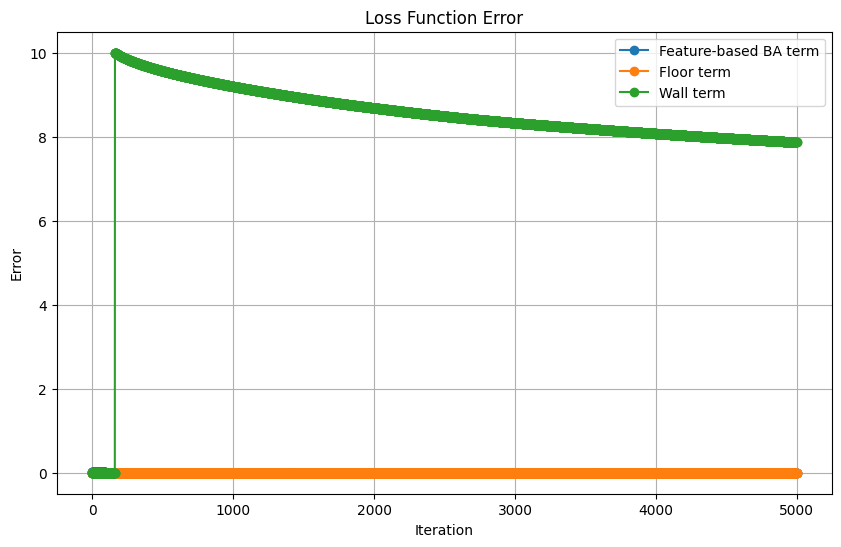

In [67]:
# Path to the text file
file_path = 'scan_lowres_002_500/results_facap/slurm.out'

# Extract errors from the file
iterations, feature_errors, floor_errors, wall_errors = extract_errors(file_path)

print(len(iterations), len(feature_errors))

# Plot the errors
plot_errors(iterations, feature_errors, floor_errors, wall_errors)

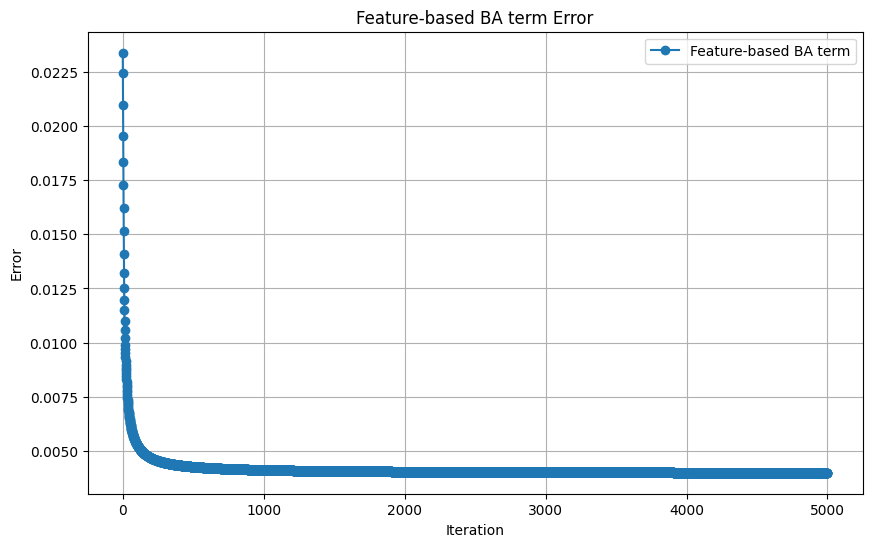

In [68]:
plot_error('Feature-based BA term', iterations, feature_errors)

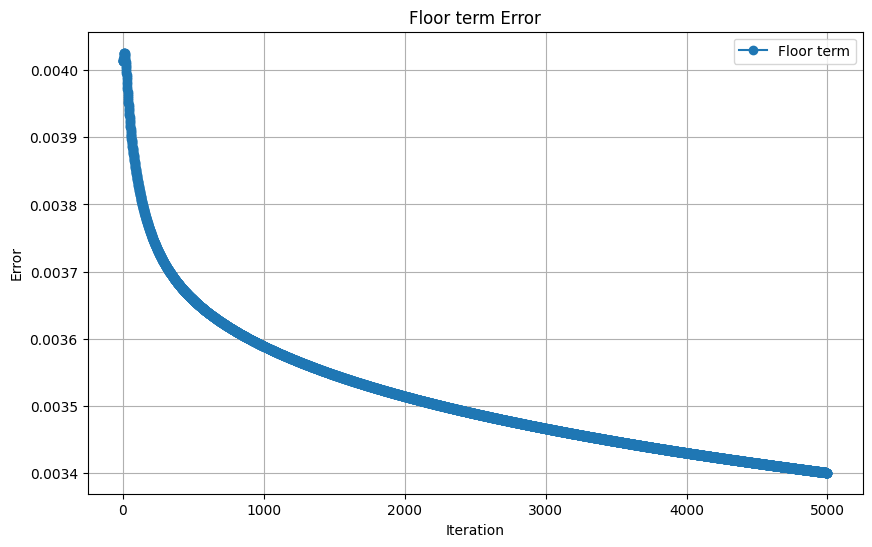

In [69]:
plot_error('Floor term', iterations, floor_errors)

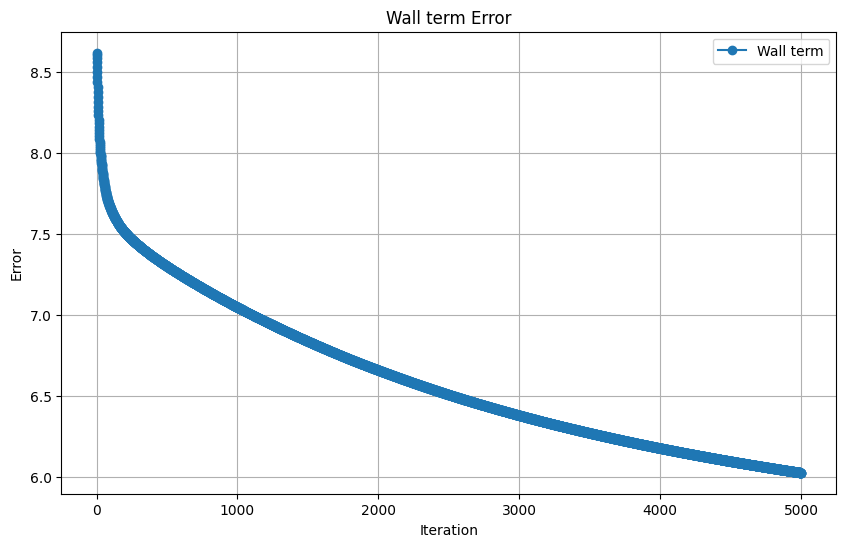

In [35]:
plot_error('Wall term', iterations, wall_errors)

In [70]:
epoch, trans, rot, yaw, pitch, roll = extract_eval(file_path)

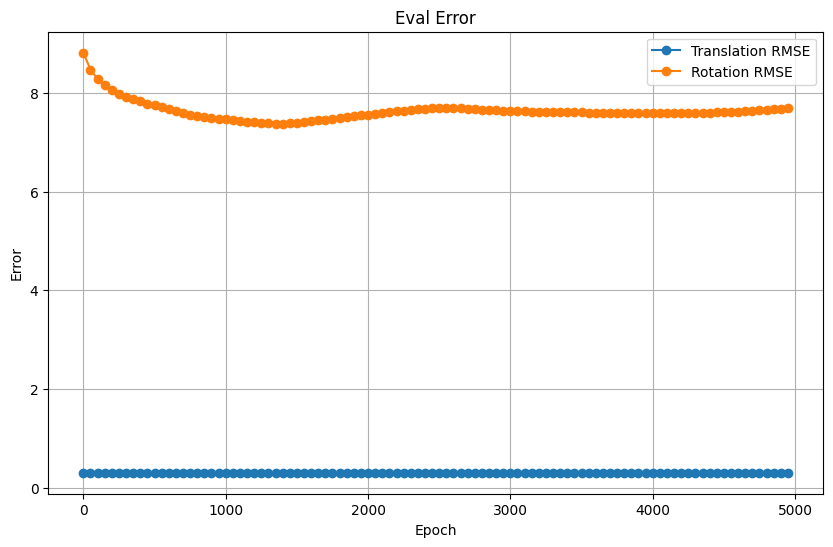

In [71]:
plot_errors_eval(epoch, trans, rot)#, rot[:3])

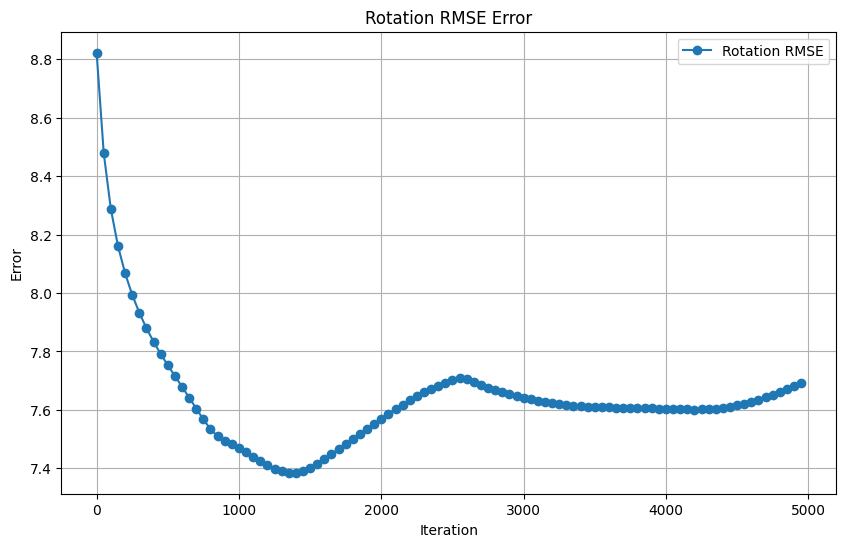

In [72]:
plot_error('Rotation RMSE',epoch, rot)#, rot[:3])

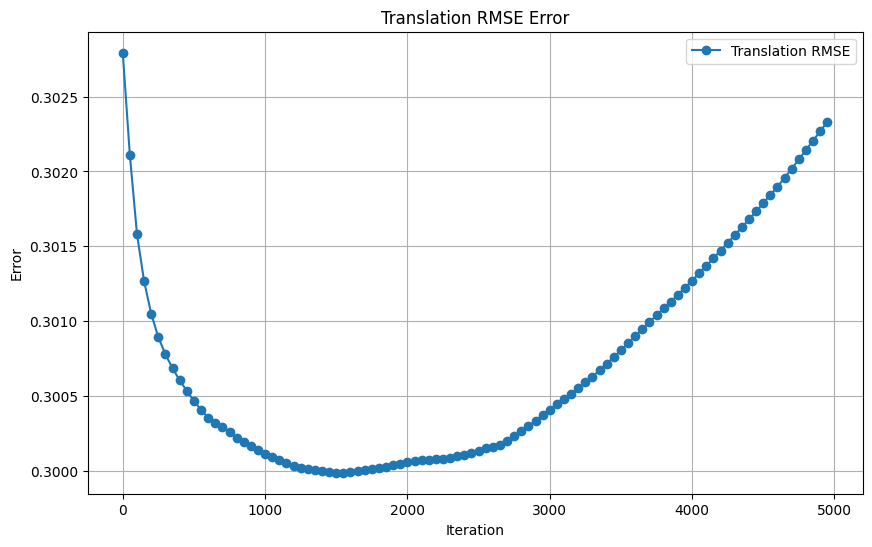

In [73]:
plot_error("Translation RMSE", epoch, trans)#, rot[:3])

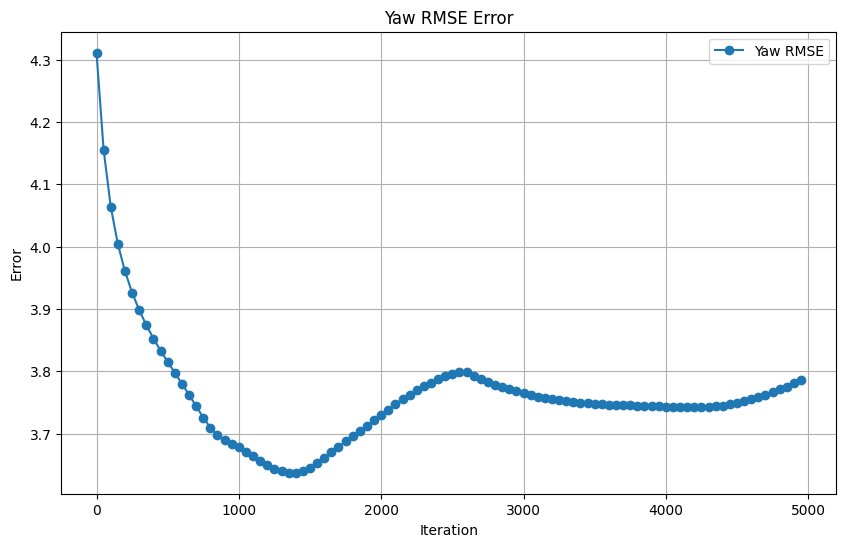

In [74]:
plot_error("Yaw RMSE", epoch, yaw)#, rot[:3])

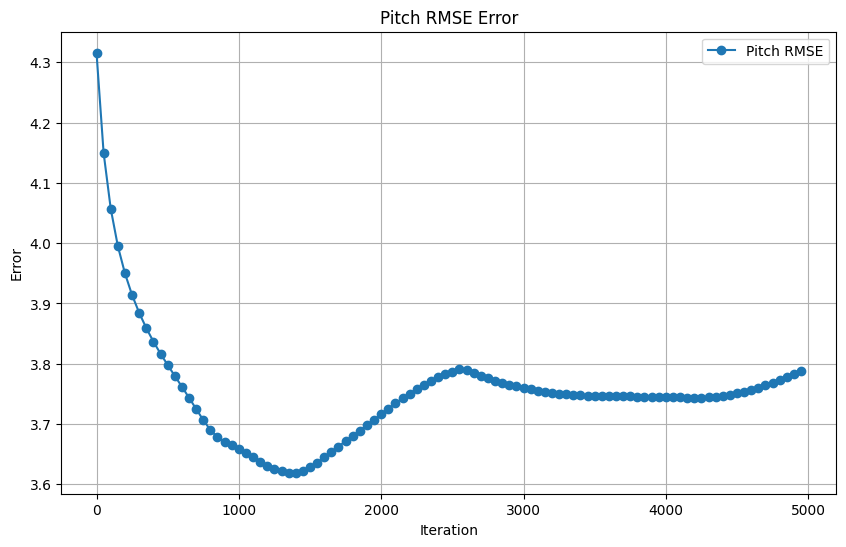

In [75]:
plot_error("Pitch RMSE", epoch, pitch)#, rot[:3])

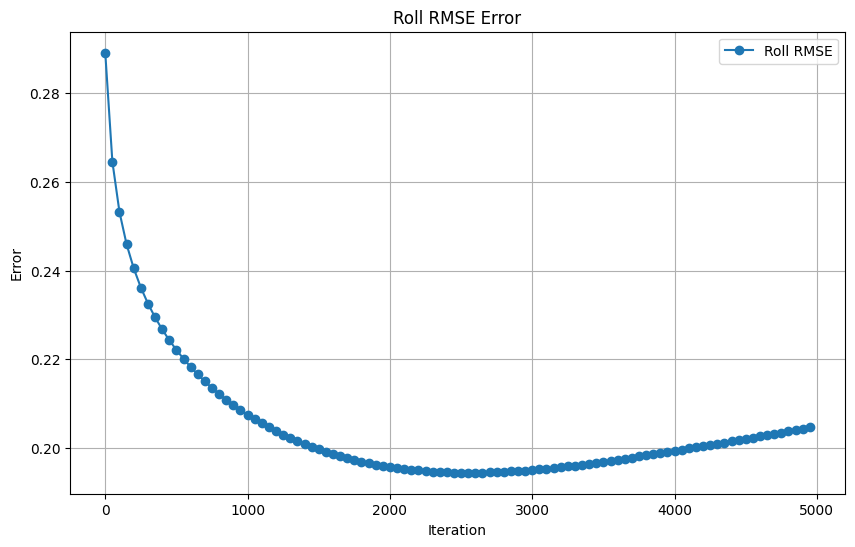

In [76]:
plot_error("Roll RMSE", epoch, roll)#, rot[:3])

In [8]:
epoch_facap, trans_facap, rot_facap, yaw_facap, pitch_facap, roll_facap = extract_eval('scan_lowres_002_500/results_facap/slurm.out')
epoch_bim, trans_bim, rot_bim, yaw_bim, pitch_bim, roll_bim = extract_eval('scan_lowres_002_500/results_bim/slurm.out')

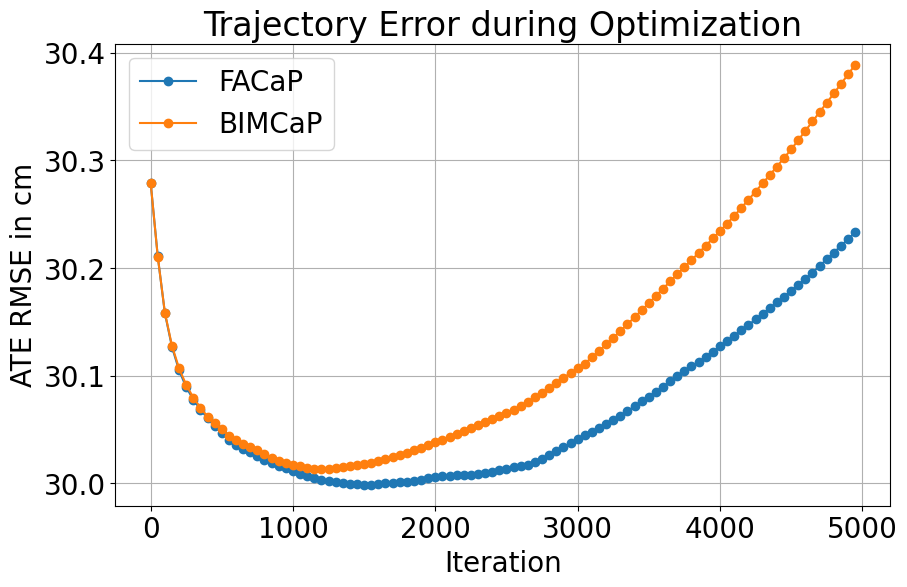

In [9]:
mpl.rcParams.update({'font.size': 20})  # Increase general font size by 3pt
plt.figure(figsize=(10, 6))
plt.plot(epoch_facap, [tran*100 for tran in trans_facap], marker='o', label='FACaP')
plt.plot(epoch_bim, [tran*100 for tran in trans_bim], marker='o', label='BIMCaP')


plt.title('Trajectory Error during Optimization')
plt.xlabel('Iteration')
plt.ylabel('ATE RMSE in cm')
plt.legend()
plt.grid(True)
plt.savefig('Traj_Error_002_500.pdf')
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epoch_facap, rot_facap, marker='o', label='FACaP')
plt.plot(epoch_bim, rot_bim, marker='o', label='BIMCaP')


plt.title('Rotation Error during Optimization')
plt.xlabel('Iteration')
plt.ylabel('ROT RMSE in degrees')
plt.legend()
plt.grid(True)
plt.savefig('Rot_Error_002_500.pdf')
plt.show()